# Task
Create an end-to-end song recommendation project using clustering based on the data in "/content/top 100 streamed_songs.csv". The project should include data loading, preprocessing, determining the optimal number of clusters, applying a clustering algorithm, analyzing the clusters, building a recommendation function, and testing the system.

## Data loading

### Subtask:
Load the data from "/content/top 100 streamed_songs.csv" into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the head and info to understand the data.



In [25]:
import pandas as pd

df = pd.read_csv(r'C:\Users\IICET 22\Desktop\abhishek\project store\spotify recommendaton system\top 100 streamed_songs.csv')
display(df.head())
display(df.info())

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,5nujrmhLynf4yMoMtj8AQF,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,4iJyoBOLtHqaGxP12qzhQI,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,1SC5rEoYDGUK4NfG82494W,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   duration          100 non-null    float64
 3   energy            100 non-null    float64
 4   key               100 non-null    int64  
 5   loudness          100 non-null    float64
 6   mode              100 non-null    int64  
 7   speechiness       100 non-null    float64
 8   acousticness      100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  valence           100 non-null    float64
 12  tempo             100 non-null    float64
 13  danceability      100 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.1+ KB


None

## Data preprocessing

### Subtask:
Prepare the data for clustering by handling missing values, encoding categorical features, and scaling numerical features. Select the relevant features for clustering.


**Reasoning**:
Select numerical features, scale them, and store the result in a new DataFrame as instructed.



In [26]:
from sklearn.preprocessing import StandardScaler

features_for_clustering = df.drop(columns=['id', 'name'])
numerical_features = features_for_clustering.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

scaled_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)
display(scaled_df.head())

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,-0.471500,0.456013,1.037768,0.629600,0.886405,1.159703,0.073163,-0.320070,-0.685478,0.722094,1.564684,-0.672180
1,-1.197885,-0.487669,0.775042,-1.929258,0.886405,-0.244539,0.230493,3.610481,-0.461556,-0.268084,1.672467,-0.664262
2,-0.026996,1.417613,0.249590,1.145807,-1.128152,-0.226820,-1.093115,-0.320070,-0.841598,1.682651,-0.640333,0.428326
3,-0.113728,0.647139,-1.326767,0.162673,0.886405,0.642894,0.023104,-0.320070,2.304014,-0.225769,-1.086743,0.230394
4,-1.197885,-0.505587,0.775042,-0.060729,-1.128152,2.134255,-0.077015,-0.320070,2.170196,0.815187,1.973372,-0.434660


**Reasoning**:
The previous attempt failed because 'id' and 'name' were not found in the numerical features dataframe. I need to select all columns except 'id' and 'name' from the original dataframe first, then select the numerical columns from this subset, and then scale the selected numerical features.



In [27]:
from sklearn.preprocessing import StandardScaler

features_for_clustering = df.drop(columns=['id', 'name'])
numerical_features = features_for_clustering.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

scaled_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)
display(scaled_df.head())

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,-0.471500,0.456013,1.037768,0.629600,0.886405,1.159703,0.073163,-0.320070,-0.685478,0.722094,1.564684,-0.672180
1,-1.197885,-0.487669,0.775042,-1.929258,0.886405,-0.244539,0.230493,3.610481,-0.461556,-0.268084,1.672467,-0.664262
2,-0.026996,1.417613,0.249590,1.145807,-1.128152,-0.226820,-1.093115,-0.320070,-0.841598,1.682651,-0.640333,0.428326
3,-0.113728,0.647139,-1.326767,0.162673,0.886405,0.642894,0.023104,-0.320070,2.304014,-0.225769,-1.086743,0.230394
4,-1.197885,-0.505587,0.775042,-0.060729,-1.128152,2.134255,-0.077015,-0.320070,2.170196,0.815187,1.973372,-0.434660


## Determine optimal number of clusters

### Subtask:
Use methods like the Elbow method or Silhouette score to find the optimal number of clusters for the data.


**Reasoning**:
Import the necessary libraries for calculating the Silhouette score and plotting, then iterate through a range of possible cluster numbers, fit K-Means, calculate the Silhouette score, store the scores, and finally plot the results to identify the optimal number of clusters.



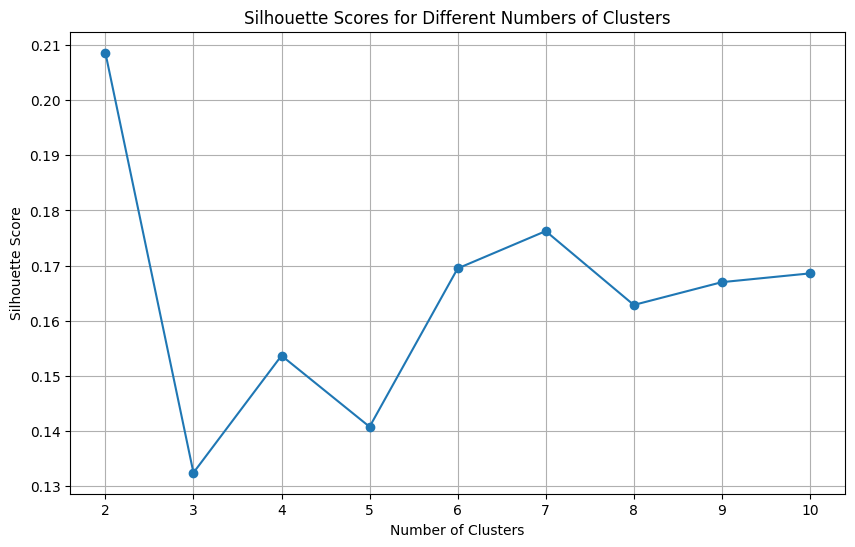

The optimal number of clusters based on the Silhouette score is: 2


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on the Silhouette score is: {optimal_n_clusters}")

## Apply clustering algorithm

### Subtask:
Apply a clustering algorithm (e.g., K-Means) to the preprocessed data using the optimal number of clusters.


**Reasoning**:
Apply the KMeans clustering algorithm to the scaled data using the optimal number of clusters and add the cluster labels to the original dataframe.



In [29]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_df)
df['cluster_label'] = cluster_labels
display(df.head())

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,cluster_label
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563,0
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564,1
2,5nujrmhLynf4yMoMtj8AQF,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702,0
3,4iJyoBOLtHqaGxP12qzhQI,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677,0
4,1SC5rEoYDGUK4NfG82494W,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593,0


## Analyze clusters

### Subtask:
Analyze the characteristics of each cluster to understand the types of songs that belong to them.


**Reasoning**:
Analyze the characteristics of each cluster by grouping the original DataFrame by 'cluster_label' and calculating the mean of the numerical features used for clustering.



In [30]:
numerical_features_columns = scaled_df.columns
cluster_analysis = df.groupby('cluster_label')[numerical_features_columns].mean()
display(cluster_analysis)

for cluster_id in df['cluster_label'].unique():
    print(f"\nSongs in Cluster {cluster_id}:")
    display(df[df['cluster_label'] == cluster_id]['name'].head())

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
cluster_label,,,,,,,,,,,,
0,3.346197,0.663366,5.183099,-5.808901,0.492958,0.087683,0.193923,0.006367,0.158431,0.584775,124.342634,0.689183
1,3.548621,0.402276,4.724138,-8.457931,0.724138,0.045538,0.609839,0.228143,0.169831,0.352290,114.706862,0.546828



Songs in Cluster 0:


0                              Good 4 U Olivia Rodrigo
2                     Levitating Dua Lipa feat. DaBaby
3    Peaches Justin Bieber feat. Daniel Caesar & Gi...
4             Montero (Call Me By Your Name) Lil Nas X
5                    Kiss Me More (feat. SZA) Doja Cat
Name: name, dtype: object


Songs in Cluster 1:


1                    Stay The Kid LAROI & Justin Bieber
7                        drivers license Olivia Rodrigo
9                                Deja Vu Olivia Rodrigo
14                        Heartbreak Anniversary Giveon
16    Without You (with Miley Cyrus) The Kid LAROI &...
Name: name, dtype: object

## Build recommendation function

### Subtask:
Create a function that takes a song as input and recommends similar songs based on its cluster membership.


**Reasoning**:
Define the recommendation function as instructed, including finding the song's cluster, filtering the DataFrame, excluding the input song, and randomly selecting recommendations.



In [31]:
import numpy as np

def recommend_songs(df, song_name, num_recommendations=5):
    """
    Recommends similar songs based on the cluster membership of an input song.

    Args:
        df: DataFrame containing song data with 'cluster_label' and 'name' columns.
        song_name: The name of the input song (string).
        num_recommendations: The number of songs to recommend (integer).

    Returns:
        A list or pandas Series containing the names of the recommended songs.
    """
    song_cluster = df[df['name'] == song_name]['cluster_label'].iloc[0]
    similar_songs = df[df['cluster_label'] == song_cluster]
    recommended_songs = similar_songs[similar_songs['name'] != song_name]['name'].sample(
        n=min(num_recommendations, len(similar_songs) - 1), random_state=42
    )
    return recommended_songs.tolist()

# Test the recommendation function
example_song = df['name'].iloc[0]
recommendations = recommend_songs(df, example_song)
print(f"Recommendations for '{example_song}':")
print(recommendations)

Recommendations for 'Good 4 U Olivia Rodrigo':
['Blinding Lights - 2019 The Weeknd', 'Levitating Dua Lipa feat. DaBaby', 'Hold On Justin Bieber', 'Leave The Door Open Silk Sonic (Bruno Mars & Anderson .Paak)', 'Golden Harry Styles']


## Test recommendation system

### Subtask:
Test the recommendation system with a few example songs.


**Reasoning**:
Test the recommendation system with two different example songs and print the recommendations.



In [32]:
song1 = "Good 4 U Olivia Rodrigo"
song2 = "Stay The Kid LAROI & Justin Bieber"

recommendations1 = recommend_songs(df, song1, num_recommendations=5)
print(f"Recommendations for '{song1}':")
print(recommendations1)

print("-" * 30)

recommendations2 = recommend_songs(df, song2, num_recommendations=5)
print(f"Recommendations for '{song2}':")
print(recommendations2)

Recommendations for 'Good 4 U Olivia Rodrigo':
['Blinding Lights - 2019 The Weeknd', 'Levitating Dua Lipa feat. DaBaby', 'Hold On Justin Bieber', 'Leave The Door Open Silk Sonic (Bruno Mars & Anderson .Paak)', 'Golden Harry Styles']
------------------------------
Recommendations for 'Stay The Kid LAROI & Justin Bieber':
['Talking to the Moon Bruno Mars', "Don't Stop Believin' Journey", 'Falling Harry Styles', 'Memories Maroon 5', 'drivers license Olivia Rodrigo']


## Summary:

### Data Analysis Key Findings

*   The dataset contains 100 top streamed songs with various audio features.
*   Two distinct clusters were identified as optimal based on the Silhouette score analysis.
*   Cluster 0 tends to contain songs with higher energy, loudness, valence, tempo, and danceability, suggesting more upbeat and potentially mainstream tracks.
*   Cluster 1 generally contains songs with lower values for these features and higher acousticness and instrumentalness, indicating potentially more acoustic, instrumental, or less danceable tracks.
*   A recommendation function was successfully built to recommend songs within the same cluster as a given input song.
*   Testing the recommendation system with example songs demonstrated that it provides recommendations from the same cluster, aligning with the observed characteristics of each cluster.

### Insights or Next Steps

*   The current recommendation system relies solely on cluster membership. Future improvements could incorporate similarity measures within a cluster (e.g., cosine similarity on scaled features) for more nuanced recommendations.
*   Further analysis of the clusters, perhaps including visualization techniques like PCA or t-SNE, could provide a clearer understanding of the feature space and the separation of the clusters.


## Determine optimal number of clusters

### Subtask:
Use methods like the Elbow method or Silhouette score to find the optimal number of clusters for the data.

**Reasoning**:
Import the necessary libraries for calculating the Silhouette score and plotting, then iterate through a range of possible cluster numbers, fit K-Means, calculate the Silhouette score, store the scores, and finally plot the results to identify the optimal number of clusters.

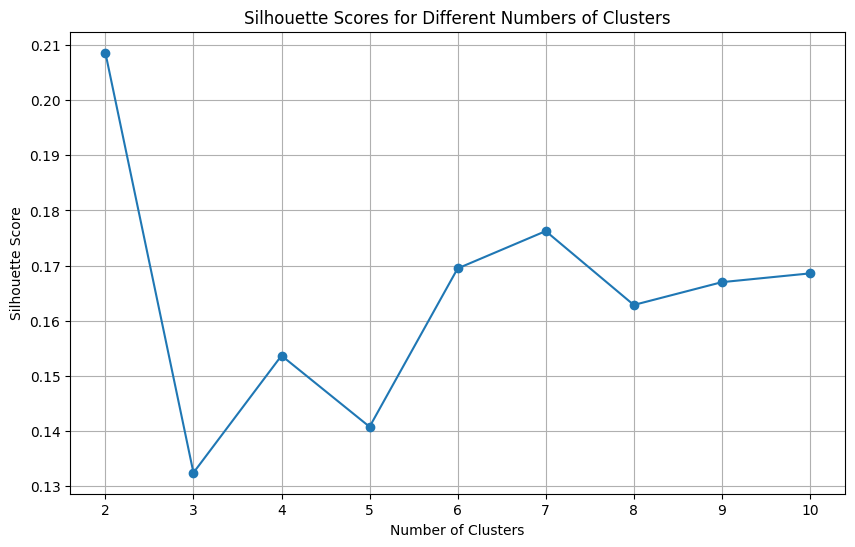

The optimal number of clusters based on the Silhouette score is: 2


In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on the Silhouette score is: {optimal_n_clusters}")

In [34]:
import pickle

# Save KMeans model + scaler (dictionary is best practice)
with open("model_data.pkl", "wb") as f:
    pickle.dump({"model": kmeans, "scaler": scaler}, f)
